In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

np.random.seed(0)

In [3]:
# 수치미분 함수

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

### Wine 클래스 (은닉층 1개)

In [3]:
class Wine:
    
    def __init__(self, name, i_node, h_node, o_node, lr):
        
        self.name = name
        
        self.W2 = np.random.rand(i_node,h_node)
        self.b2 = np.random.rand(h_node)
        
        self.W3 = np.random.rand(h_node,o_node)
        self.b3 = np.random.rand(o_node)
        
        self.lr = lr
        
        print(self.name, " is created")

        
    def feed_forward(self):
        
        delta = 1e-7
        
        z2 = np.dot(self.input_data,self.W2) + self.b2
        a2 =  sigmoid(z2)
    
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        return -np.sum(self.target_data*np.log(y+delta)) + (1-self.target_data)*np.log((1-y)+delta)
    
    def predict(self, input_data):
        
        z2 = np.dot(input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        if y >= 0.5:
            result = 1
        else:
            result = 0
        
        return y, result
    
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        unmatched_list = []
        
        for i in range(len(input_data)):
            (real_val, logical_val) = self.predict(input_data[i])
            if logical_val == target_data[i]:
                matched_list.append(i)
            else:
                unmatched_list.append(i)
                
        accuracy_ret = len(matched_list)/len(input_data)
        
        print("Accuracy => ",accuracy_ret)
        
        return matched_list, unmatched_list

    
    def train(self, input_data, target_data):
        
        self.input_data = input_data
        self.target_data = target_data
        
        f = lambda x : self.feed_forward()
        
        self.W2 -= self.lr * numerical_derivative(f, self.W2)
        self.b2 -= self.lr * numerical_derivative(f, self.b2)
        
        self.W3 -= self.lr * numerical_derivative(f, self.W3)
        self.b3 -= self.lr * numerical_derivative(f, self.b3) 

### DataGeneration

In [4]:
class DataGeneration:
    
    def __init__(self,name,file_path,seperation_rate):
        
        self.name = name
        self.file_path = file_path
        self.seperation_rate = seperation_rate
        
    def generation(self):
        
        try:
            
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
            
        except Exception as err:
            
            print("[DataGeneration::genearte()]", str(err))
            raise Exception(str(err))
            
        print("[DataGeneration] loaded_data.shape = ", loaded_data.shape)
        
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        np.random.shuffle(loaded_data)
        
        test_data = loaded_data[0: test_data_num]
        
        training_data = loaded_data[test_data_num: ]

        return training_data, test_data

In [5]:
seperation_rate = 0.3

data_obj = DataGeneration('Wine', './(200309)Wine.csv',seperation_rate)

(training_data,test_data) = data_obj.generation()

[DataGeneration] loaded_data.shape =  (6497, 13)


In [6]:
i_nodes = training_data.shape[1] - 1
h_nodes = 5
o_nodes = 1
lr = 1e-4
epochs = 20

loss_val_list = []

obj = Wine("Wine", i_nodes, h_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for i in range(len(training_data)):
        
        input_data = training_data[i,0:-1]
        target_data = training_data[i,[-1]]
        
        obj.train(input_data, target_data)
        
    cur_loss_val = obj.feed_forward()
    print("epochs = ", step, "loss value = ", cur_loss_val)
    loss_val_list.append(cur_loss_val)
    
end_time = datetime.now()

print("")
print("Elapsed time =>",end_time-start_time)

Wine  is created
Neural Network Learning using Numerical Derivative...
epochs =  0 loss value =  [-6.29702124]
epochs =  1 loss value =  [-8.34981163]
epochs =  2 loss value =  [-10.39992795]
epochs =  3 loss value =  [-12.41257433]
epochs =  4 loss value =  [-14.19115077]
epochs =  5 loss value =  [-15.26908829]
epochs =  6 loss value =  [-15.69183325]
epochs =  7 loss value =  [-15.85744595]
epochs =  8 loss value =  [-15.93623191]
epochs =  9 loss value =  [-15.98032178]
epochs =  10 loss value =  [-16.00795018]
epochs =  11 loss value =  [-16.02669331]
epochs =  12 loss value =  [-16.04016381]
epochs =  13 loss value =  [-16.05027474]
epochs =  14 loss value =  [-16.05812429]
epochs =  15 loss value =  [-16.06438411]
epochs =  16 loss value =  [-16.06948644]
epochs =  17 loss value =  [-16.07372125]
epochs =  18 loss value =  [-16.07728998]
epochs =  19 loss value =  [-16.08033663]

Elapsed time => 0:09:35.362469


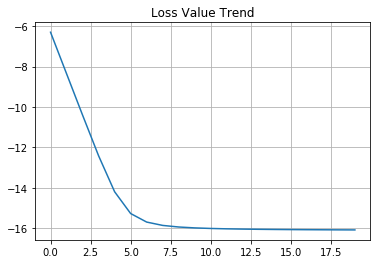

In [7]:
plt.title('Loss Value Trend')
plt.grid()
plt.plot(loss_val_list)

plt.show()

In [8]:
test_input_data = test_data[:,0:-1]
test_target_data = test_data[:,-1]

(true_list, false_list) = obj.accuracy(test_input_data, test_target_data)

Accuracy =>  0.2452539763981529


### 은닉층 2개

In [10]:
class Wine:
    
    def __init__(self,name,i_node,h1_node,h2_node,o_node,lr):
        
        self.name = name
        
        self.W2 = np.random.rand(i_node,h1_node)
        self.b2 = np.random.rand(h1_node)
        
        self.W3 = np.random.rand(h1_node,h2_node)
        self.b3 = np.random.rand(h2_node)
        
        self.W4 = np.random.rand(h2_node,o_node)
        self.b4 = np.random.rand(o_node)
        
        self.lr = lr
        
        print(self.name," object is created!")
        
    def feed_forward(self):
        
        delta = 1e-7
        
        z2 = np.dot(self.input_data,self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2,self.W3) + self.b3
        a3 = sigmoid(z3)
        
        z4 = np.dot(a3,self.W4) + self.b4
        y = a4 = sigmoid(z4)
        
        return np.sum(self.target_data*np.log(y+delta) + (1-self.target_data)*np.log((1-y)+delta))
    
    def predict(self,input_data):
        
        delta = 1e-7
        
        z2 = np.dot(self.input_data,self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2,self.W3) + self.b3
        a3 = sigmoid(z3)
        
        z4 = np.dot(a3,self.W4) + self.b4
        y = a4 = sigmoid(z4)
        
        if y >= 0.5:
            result = 1
        else:
            result = 0
            
        return y, result
    
    def accuracy(self,input_data,target_data):
        
        matched_list = []
        unmatched_list = []
        
        for i in range(len(input_data)):
            
            (real_val, logical_val) = self.predict(input_data[i])
            
            if real_val == target_data[i]:
                mathced_list.append(i)
            else:
                unmatched_list.appedn(i)
                
        accuracy_ret = len(matched_list)/len(input_data)
        
        return accuracy_ret
    
    def train(self,input_data,target_data):
        
        self.input_data = input_data
        self.target_data = target_data
        
        f = lambda x : self.feed_forward()
        
        self.W2 -= self.lr * numerical_derivative(f,self.W2)
        self.b2 -= self.lr * numerical_derivative(f,self.b2)
        
        self.W3 -= self.lr * numerical_derivative(f,self.W3)
        self.b3 -= self.lr * numerical_derivative(f,self.b3)
        
        self.W4 -= self.lr * numerical_derivative(f,self.W4)
        self.b4 -= self.lr * numerical_derivative(f,self.b4)

In [11]:
class Generator:
    
    def __init__(self,file_path,seperation_rate):
        
        self.file_path = file_path
        self.seperation_rate = seperation_rate
        
    def generate(self):
        
        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
        except Exception as err:
            
            print("[DataGeneration::genearte()]", str(err))
            raise Exception(str(err))
            
        np.random.shuffle(loaded_data)
        
        total_data_num = len(loaded_data)
        test_data_num = int(total_data_num * self.seperation_rate)
        
        test_data = loaded_data[ :test_data_num]
        training_data = loaded_data[test_data_num: ]
        
        return training_data, test_data   

In [12]:
seperation_rate = 0.3

data_obj = Generator('./(200309)Wine.csv',seperation_rate)

(training_data,test_data) = data_obj.generate()

print(training_data.shape)
print(test_data.shape)

(4548, 13)
(1949, 13)


In [ ]:
i_node = training_data.shape[1]-1
h1_node = 2
h2_node = 3
o_node = 1
lr = 1e-4
epochs = 20

loss_val_list = []

obj = Wine("wine",i_node, h1_node, h2_node, o_node, lr)

start_time = datetime.now()

for step in range(epochs):
    for i in range(len(training_data)):
        input_data = training_data[:,:-1]
        target_data = training_data[:,[-1]]
        obj.train(input_data,target_data)
        
    cur_loss_val = obj.feed_forward()
    print("step = ",step, "loss value = ",cur_loss_val)
    
    loss_val_list.append(cur_loss_val)
    
end_time = datetime.now()

print("Elapsed time =>", end_time-start_time )

wine  object is created!
step =  0 loss value =  -55268.39750015729
step =  1 loss value =  -55268.67368418726
